In [20]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as st
from typing import Tuple, List, Dict, Optional
#from scipy.stats import pearsonr
import copy
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)

In [21]:
def hist_subplot(df, col, sd=1, darkmode=False, ax=None):
    
    title_fontsize = 20
    label_fontsize = 16
    tick_fontsize = 16
    legend_fontsize = 12
    
    if darkmode:
        facecolor = '0.1'
        color1 = '#B3B3B3'
        color2 = 'green'
        color3 = 'red'
    else:
        facecolor = 'white'
        color1 = '#051D40'
        color2 = '#55aeff'
        color3 = '#FF5757'
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6), facecolor=facecolor)
    else:
        fig = ax.get_figure()
       
    mean_val = df[col].mean()
    sd_val = df[col].std() * sd
    bin_edges = np.arange(np.floor(df[col].min()) - 0.5, np.ceil(df[col].max()) + 1.5, 1)
    sns.histplot(data=df[col], kde=False, bins=bin_edges, color=color2, ax=ax, edgecolor=color1)
    ax.set_xlabel("", color=color1, fontsize=label_fontsize)
    ax.set_ylabel("", color=color1, fontsize=label_fontsize)
    ax.set_title(col, color=color1, fontsize=title_fontsize, fontweight='bold')
    max_y = df[col].max()
    ax.set_xlim(-0.5, max_y + 0.5)
    ax.set_ylim(0, None)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    if sd:
        ax.axvline(x=mean_val, color=color3)
        ax.axvline(x=mean_val + sd_val, color=color3, linestyle='--')
        ax.axvline(x=mean_val - sd_val, color=color3, linestyle='--')
        ax.legend([f"Mean {mean_val:.1f}", f"SD ±{sd_val:.1f}"], loc='upper left', facecolor=facecolor, edgecolor=color1, fontsize=legend_fontsize)

        for text in ax.legend_.get_texts():
            text.set_color(color1)
    
    ax.set_facecolor(facecolor)
    for spine in ax.spines.values():
        spine.set_edgecolor(color1)
        
    ax.tick_params(axis='x', colors=color1, labelsize=tick_fontsize)
    ax.tick_params(axis='y', colors=color1, labelsize=tick_fontsize)
    
    return fig, ax

In [22]:
def plot_2x2_subplots(specs, title=None, darkmode=False):
    if len(specs) != 4:
        raise ValueError("The 'specs' list must contain exactly 4 tuples.")
    
    if darkmode:
        facecolor = '0.1'
        color1 = '#B3B3B3'
        color2 = 'green'
        color3 = 'red'
    else:
        facecolor = 'white'
        color1 = '#051D40'
        color2 = '#55aeff'
        color3 = '#FF5757'

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), facecolor=facecolor)
    for idx, ax in enumerate(axes.flatten()):
        #hist_subplot(*specs[idx], ax=ax)
        hist_subplot(*specs[idx][:3], darkmode=darkmode, ax=ax)
    
    if title is not None:
        fig.suptitle(f"{title} Frequency vs. Score", fontsize=28, fontweight='bold', color=color1, y=0.99)
    
    fig.tight_layout()
    plt.show()

### Code Execution:

In [23]:
df = pd.read_csv('data/combined_final.csv')
df.tail(1)
df = df.drop(columns={'text', 'link'})
df.head(1)
#df = df.drop(columns={'hcs', 'aics'})

,smog,cole,auto,dale,pows,forc,spac,gunn,fleG2,fleS,rank,word_count,hcs,aics
0,12.0,12.0,12.0,10.0,16.2,16.3,5.0,13.2,12.0,23.5,15,200.0,89.878726,10.121275


In [24]:
rename_dict = {'smog': 'Smog Index', 'cole': 'Coleman-Liau Index', 'auto': 'Automated Readability Index', 'dale': 'Dale-Chall Index', 'pows': 'Powers-Sumner-Kearl Index', 'forc': 'FORCAST Grade', 'spac': 'Spache Readability Grade', 'gunn': 'Gunning-Fog Index', 'fleG2': 'Flesch-Kincaid Grade', 'fleS': 'Flesch Reading Ease Index'}
df = df.rename(columns=rename_dict)

In [25]:
new_order = ['rank', 'Flesch Reading Ease Index', 'Gunning-Fog Index', 'FORCAST Grade', 'Dale-Chall Index', 'Powers-Sumner-Kearl Index','Automated Readability Index', 'Flesch-Kincaid Grade', 'Coleman-Liau Index', 'Smog Index', 'Spache Readability Grade', 'word_count', 'aics', 'hcs']
df = df.reindex(columns=new_order)

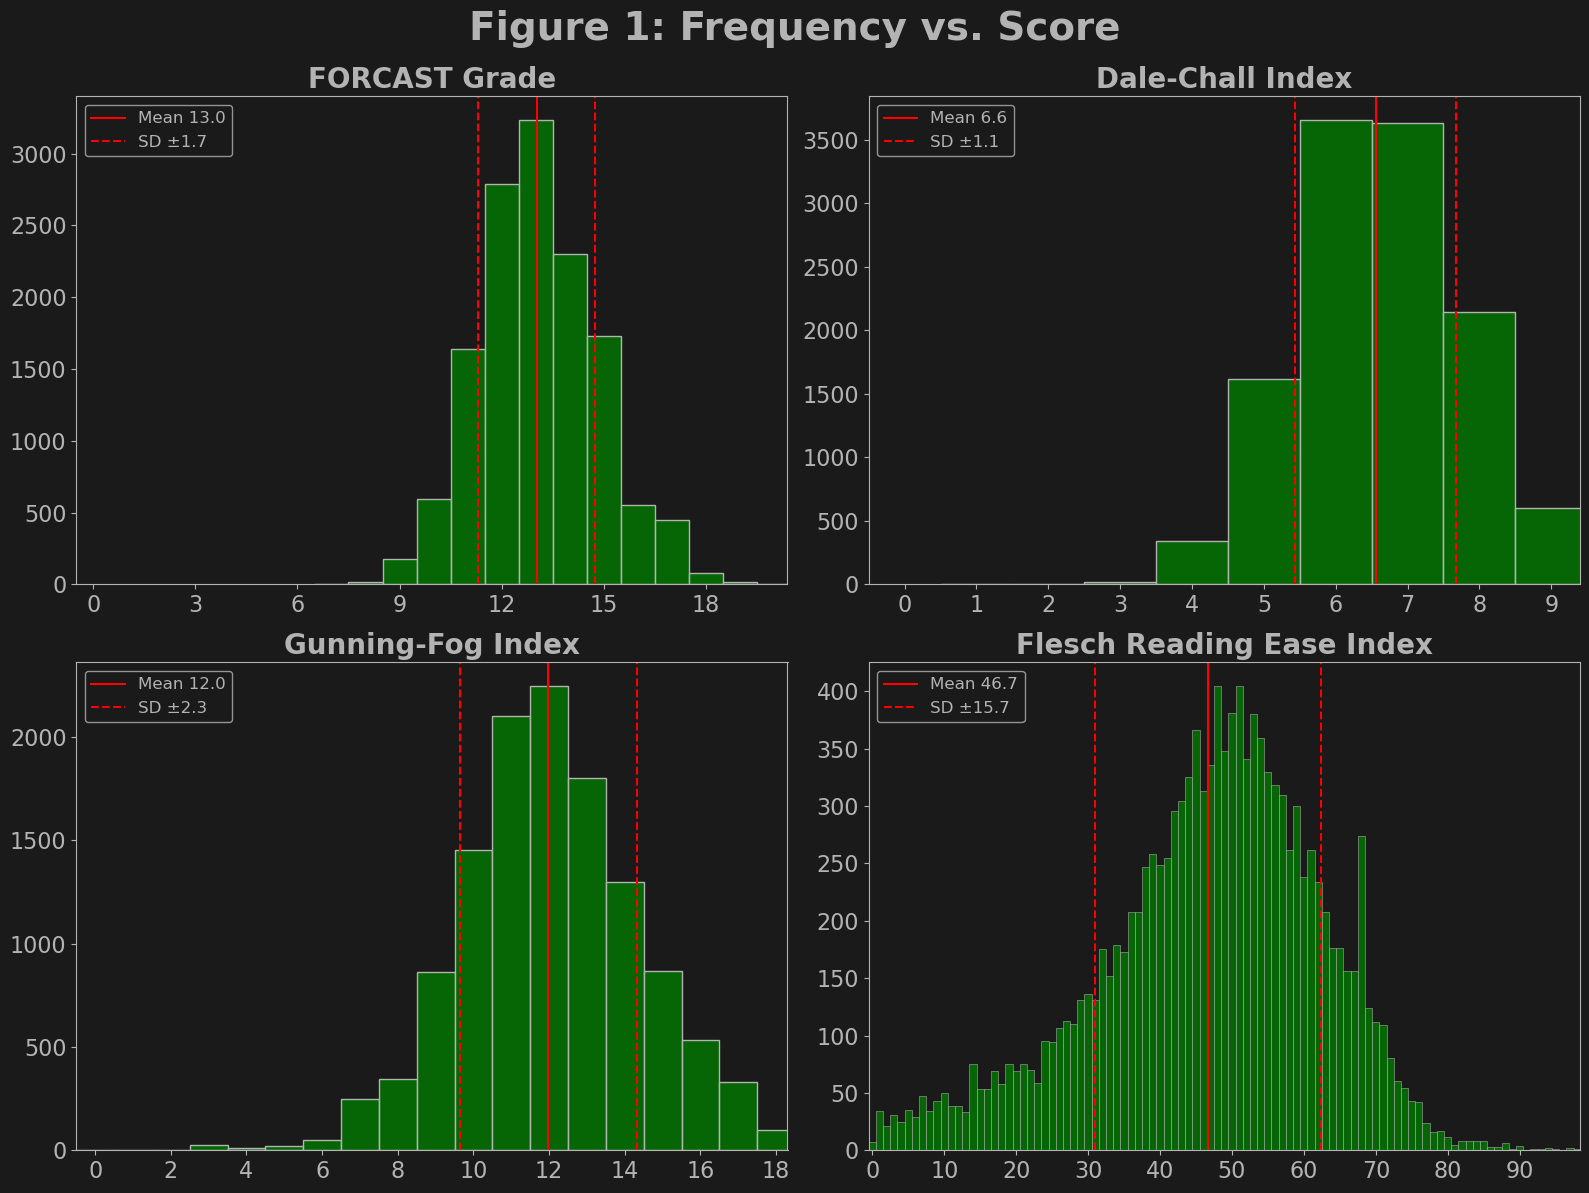

In [26]:
col_1 = 'FORCAST Grade'
df_fg = df[(df[col_1] > 0) & (df[col_1] < 20)].copy(deep=True)

col_2 = 'Dale-Chall Index'
df_dci = df[(df[col_2] > 0) & (df[col_2] < 9)].copy(deep=True)

col_3 = 'Gunning-Fog Index'
df_gfi = df[(df[col_3] > 0) & (df[col_3] < 17.9)].copy(deep=True)

col_4 = 'Flesch Reading Ease Index'
df_fre = df[(df[col_4] > 0.1) & (df[col_4] < 99.9)].copy(deep=True)

specs = [(df_fg, col_1, 1),
         (df_dci, col_2, 1),
         (df_gfi, col_3, 1),
         (df_fre, col_4, 1)
         ]

plot_2x2_subplots(specs, title='Figure 1:', darkmode=True)

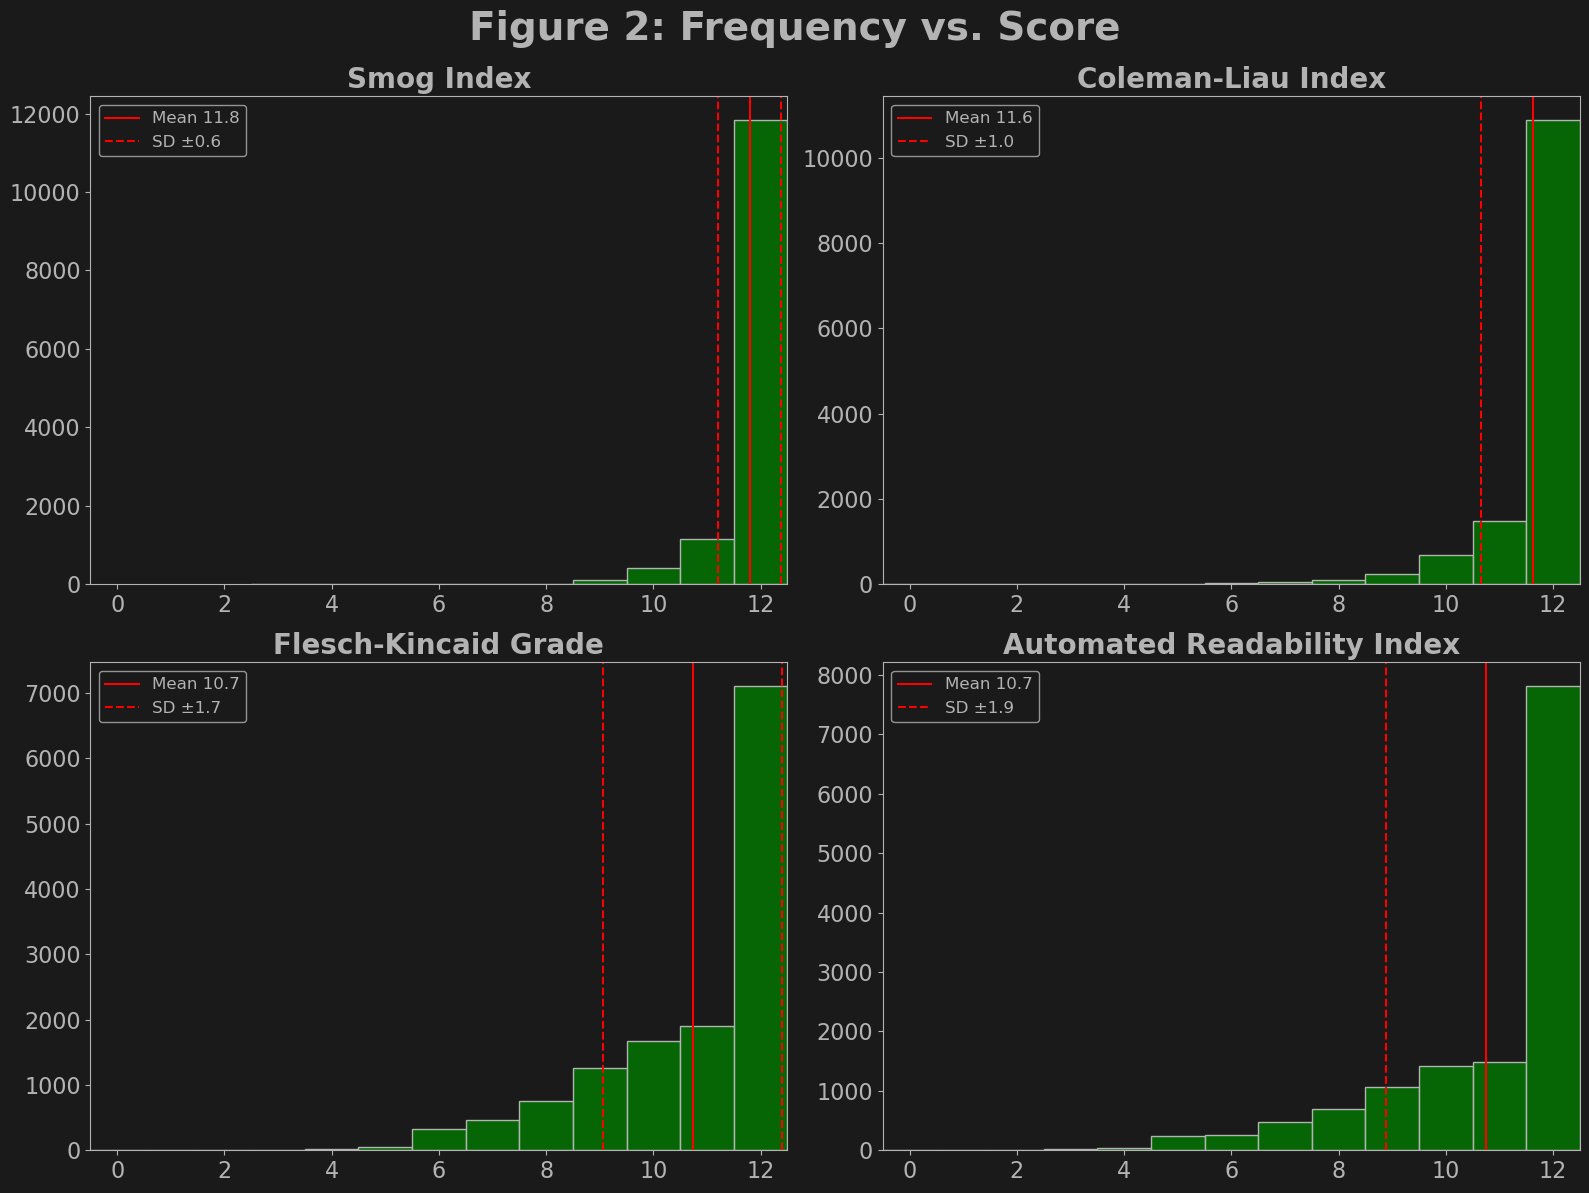

In [28]:
col_1 =  'Smog Index'
df_si = df[(df[col_1] > 0.5) & (df[col_1] < 20)].copy(deep=True)

col_2 = 'Coleman-Liau Index'
df_cli = df[(df[col_2] > 0.5) & (df[col_2] < 20)].copy(deep=True)

col_3 = 'Flesch-Kincaid Grade'
df_fcg = df[(df[col_3] > 0.5) & (df[col_3] < 20)].copy(deep=True)

col_4 = 'Automated Readability Index'
df_ari = df[(df[col_4] > 0.5) & (df[col_4] < 20)].copy(deep=True)

specs = [(df_si, col_1, 1), (df_cli, col_2, 1), (df_fcg, col_3, 1), (df_ari, col_4, 1)]

plot_2x2_subplots(specs, title='Figure 2:', darkmode=True)